##TAREA
#Autor: Pedro Illaisaca
#Asignatura: Simulación


Paso1:  Importar Librerias

## Ejercicio en Clase

Utilizar Matplot y Plotly para realizar las graficas.

1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.
# Resolucion

In [ ]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
# from google.colab import files
import plotly.graph_objects as go

Paso 2: Cargar conjunto de datos

In [ ]:
#Trabajar con otro tipo de datos Fifa
#Previamente ralizar la conexion con drive!!!!11
fifa = pd.read_csv("drive/MyDrive/DATOS_SIMULACION/fifa_datos.csv",encoding="utf-8")
#imprimir los primeros 5 datos del archivo
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Paso 3: Extraemos los rangos de datos segun lo especificado en las intrucciones de la tarea y graficamos usando la libreria matplotlib

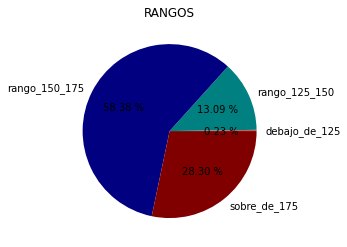

In [ ]:
# Generar un grafico de cual es su pie diestro

debajo_de_125 = fifa.loc[fifa['Weight'] < '125lbs'].count()[0]
rango_125_150 = fifa.loc[ (fifa['Weight'] > '125lbs') & (fifa['Weight'] < '150lbs') ].count()[0]
rango_150_175 = fifa.loc[ (fifa['Weight'] > '150lbs') & (fifa['Weight'] < '175lbs') ].count()[0]
sobre_de_175 = fifa.loc[fifa['Weight'] > '175lbs'].count()[0]


plt.figure()

etiquetas = ["debajo_de_125","rango_125_150","rango_150_175","sobre_de_175"]
colores= ['#cd5c5c', '#008080',"#000080","#800000"]
plt.pie([debajo_de_125,rango_125_150,rango_150_175,sobre_de_175], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('RANGOS')
plt.show()

Paso 4: Realizamos un filtrado mas avanzado usando el metodo .groupby() para extraer datos rederentes a las habilidades de los jugadores del dataframe y graficamos usado la libreria matplotlib

<Figure size 432x288 with 0 Axes>

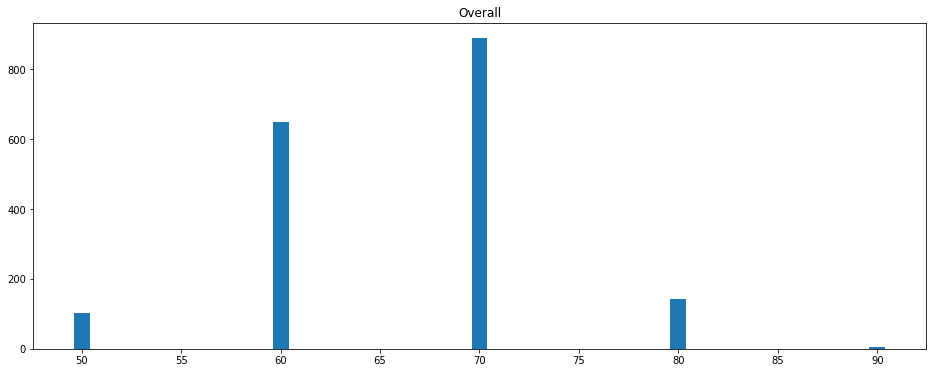

In [ ]:
#Grafico de Barras

df_pedro=fifa.groupby(['Overall']).size().reset_index(name='count')

d40=df_pedro[df_pedro['Overall']==40]
d50=df_pedro[df_pedro['Overall']==50]
d60=df_pedro[df_pedro['Overall']==60]
d70=df_pedro[df_pedro['Overall']==70]
d80=df_pedro[df_pedro['Overall']==80]
d90=df_pedro[df_pedro['Overall']==90]

df_final=pd.concat([d40,d50,d60,d70,d80,d90])


#EL VALOR 40 NO TIENE NINGUN DATO ASI QUE PANDAS LO DESCARTA

# etiquetas = ['40','50','60','70','80','90']
# valores = np.arange(1,4,1)


val_x=df_final['Overall'].to_numpy().tolist()
val_y=df_final['count'].to_numpy().tolist()

plt.figure()
plt.figure(figsize=(16,6))
plt.title('Overall')
barras = plt.bar(val_x,val_y)



plt.show()  





##Usando plotly
Luego prodecemos a graficar los mismos resultados obtenidos anteriormente pero con la diferencia que haora usamos la libreria de graficas interactivas plotly

In [ ]:
fig=go.Figure(data=[go.Pie(labels=etiquetas,values=[debajo_de_125,rango_125_150,rango_150_175,sobre_de_175])])
fig.show()

In [ ]:
import plotly.express as px
# df_final=px.data.tips()
figura=px.histogram(fifa,x='Overall',nbins=20)
figura.show()


In [ ]:
fifa